In [550]:
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt

### Construct a signal with a high freq and low freq component (to emulate SA + Planck)

In [551]:
x = np.linspace(0, 6*np.pi, 1000)
N = len(x)

m1 = 0.3*np.sin(10*x) # High freq component 
m2 = np.sin(x) # Low freq component

m = m1 + m2

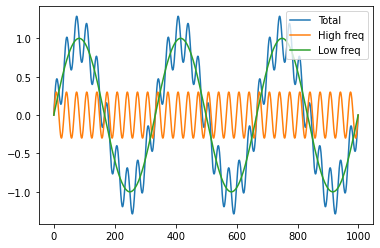

In [552]:
plt.plot(m, label='Total')
plt.plot(m1, label='High freq')
plt.plot(m2, label='Low freq')
plt.legend()

### Use $F$ as the Fourier transform operator and use it to represent the map in terms of its Fourier amplitudes

### To use your notation, $m = Bb$, where $B=F^{-1}$ contains the complex exponential templates and $b = Fm$ contains the amplitudes.

### Then $b$ is what we eventually solve for with the CG method after deriving the equations?

In [572]:
F = sp.linalg.dft(N)
F_inv = F.T/N

### Now to construct the frequency domain filter A

In [568]:
cutoff = 15 # Pick where to separate SA and Planck modes

I = np.eye(N)

for i in range(cutoff):
    I[i][i] = 0
    I[-i][-i] = 0
    
I_c = np.eye(N) - I # Construct the complement

### Check that the cutoff number separates the 2 frequencies

/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


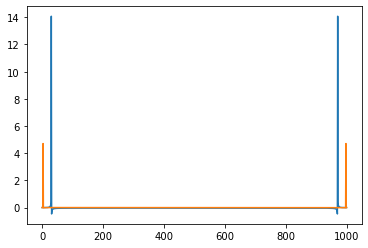

In [569]:
# plt.plot(F@s)
plt.plot(I@F@s)
plt.plot(I_c@F@s)

### Constuct the filtering operator A and (1 - A) like we talked about


In [570]:
A = F_inv @ I @ F
A_c = F_inv @ I_c @ F # (1 - A)

/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/scratch/yuyang/conda/envs/toast/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


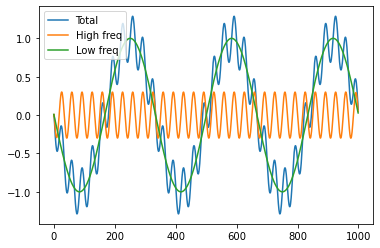

In [571]:
plt.plot(A @ m + A_c @ m, label='Total')
plt.plot(A @ m, label='High freq') #Small scale modes
plt.plot(A_c @ m, label='Low freq') #Large scale modes
plt.legend()

### This shows filtering operator A can sucessfully split the map into low and high freq modes! Not sure why the phase is flipped, though